# Medical Cost Prediction - Healthcare Domain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# choose a matplotlib style option
plt.style.use('fivethirtyeight')

# choose seaborn style option
sns.set_style('darkgrid')

# for HD visualizations
%config Inlinebackend.figure_format='retina'

In [2]:
# Loading the Dataset
medical = pd.read_csv("D:\Data\Machine_Learning\insurance.csv")

### Inspecting the dataset

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Cleaning

In [6]:
medical.duplicated()
medical.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [7]:
medical[medical.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# Droping the duplicates

medical.drop_duplicates(keep = 'first', inplace=True)
medical.reset_index(inplace=True)

In [9]:
medical.drop(['index'], axis=1, inplace=True)

### Checking the Missing Values

In [10]:
medical.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# To Check Wheather the Corrupted Values or not.
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [12]:
# descriptive Statistics

medical.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [13]:
medical.mean()
print('=='*15)
medical.median()
print('=='*15)
medical.skew()
print('=='*15)
medical.kurt()

age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64

age           39.0000
bmi           30.4000
children       1.0000
charges     9386.1613
dtype: float64

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

age        -1.244406
bmi        -0.052947
children    0.200954
charges     1.604221
dtype: float64

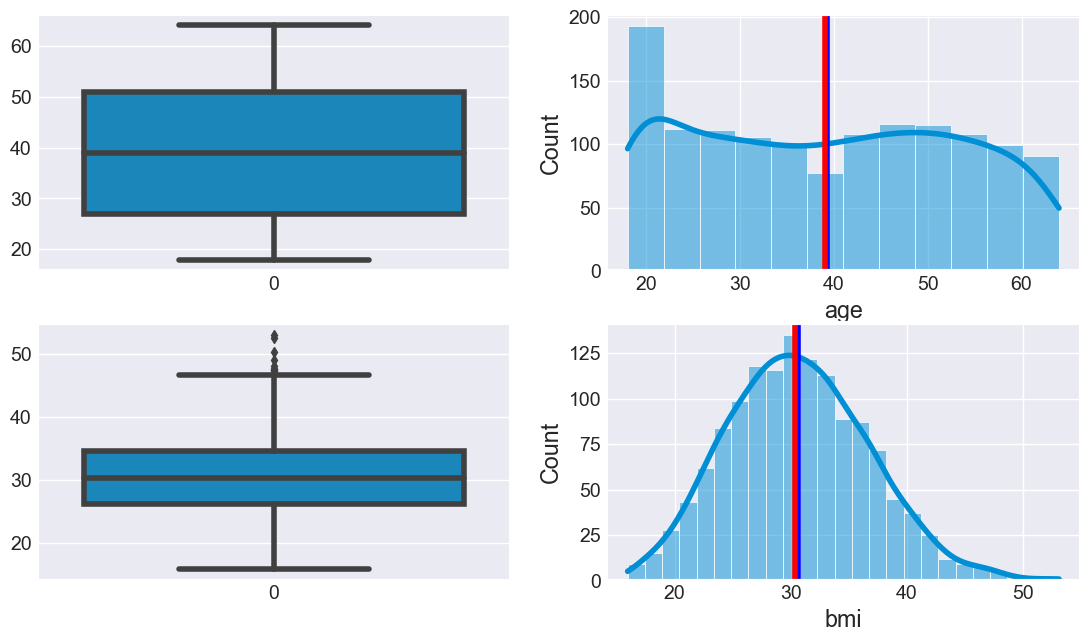

In [14]:
plt.figure(figsize=(12,7))

plt.subplot(221)
sns.boxplot(medical.age)

plt.subplot(222)
sns.histplot(medical.age, kde = True)
plt.axvline(medical.age.mean(), color = 'blue')
plt.axvline(medical.age.median(), color = 'red');

plt.subplot(223)
sns.boxplot(medical.bmi)

plt.subplot(224)
sns.histplot(medical.bmi, kde = True)
plt.axvline(medical.bmi.mean(), color = 'blue')
plt.axvline(medical.bmi.median(), color = 'red');

# Conclusion:
# Outliers are present in bmi column.

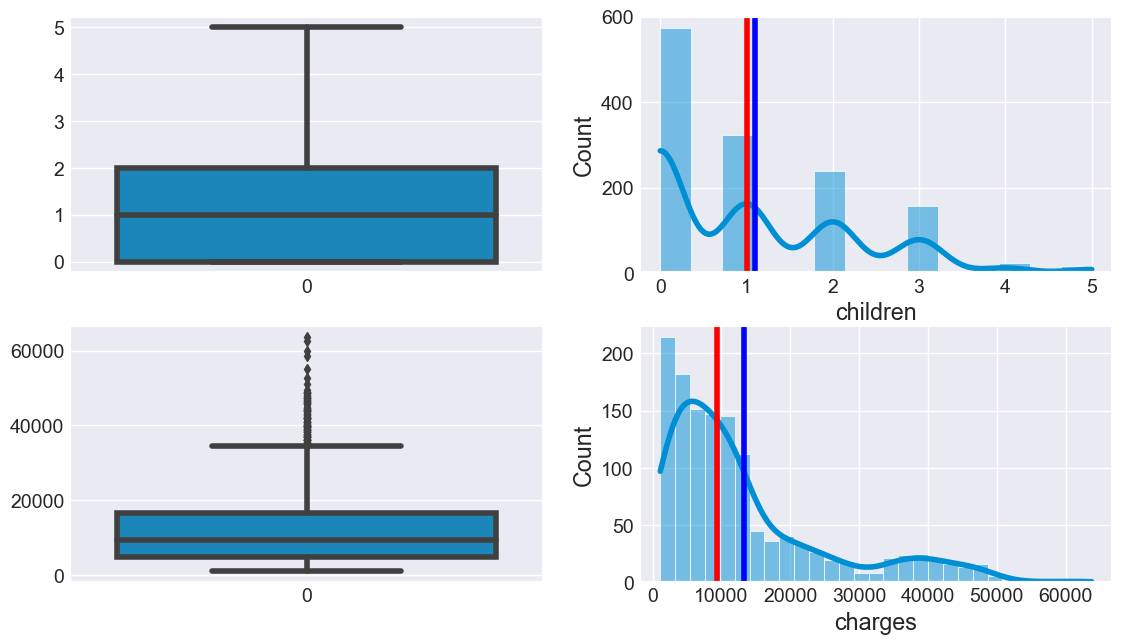

In [15]:
plt.figure(figsize=(12,7))

plt.subplot(221)
sns.boxplot(medical.children)

plt.subplot(222)
sns.histplot(medical.children, kde = True)
plt.axvline(medical.children.mean(), color = 'blue')
plt.axvline(medical.children.median(), color = 'red');

plt.subplot(223)
sns.boxplot(medical.charges)

plt.subplot(224)
sns.histplot(medical.charges, kde = True)
plt.axvline(medical.charges.mean(), color = 'blue')
plt.axvline(medical.charges.median(), color = 'red');

# Conclusion:
# Outliers are present in charges column.

In [16]:
Q1, Q2, Q3 = tuple(medical.charges.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)

4746.344 9386.1613 16657.71745


In [17]:
num=medical.select_dtypes(include='number')
num
def out(col):
    q1=medical[col].quantile(0.25)
    q3=medical[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=medical[(medical[col]<lb) | (medical[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))
    
medical.drop(droplist,axis=0,inplace=True)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


<AxesSubplot: >

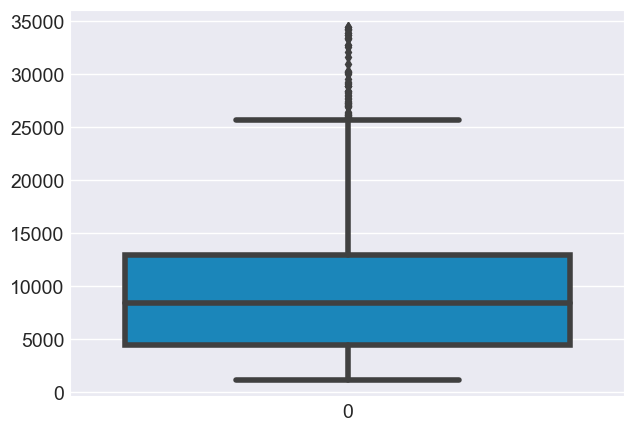

In [18]:
sns.boxplot(medical.charges)

In [19]:
num=medical.select_dtypes(include='number')
num
def out(col):
    q1=medical[col].quantile(0.25)
    q3=medical[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=medical[(medical[col]<lb) | (medical[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))
    
medical.drop(droplist,axis=0,inplace=True)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


<AxesSubplot: >

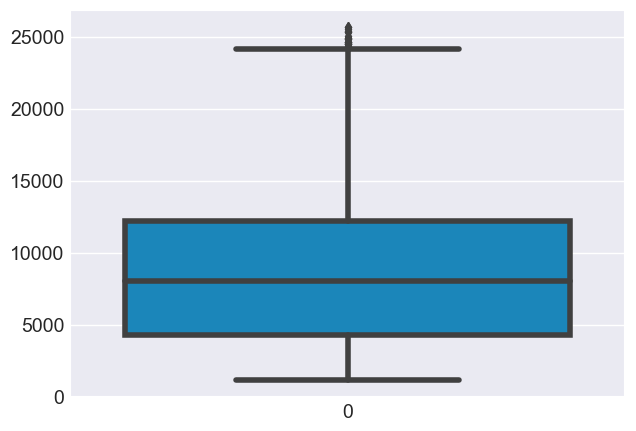

In [20]:
sns.boxplot(medical.charges)

In [21]:
num=medical.select_dtypes(include='number')
num
def out(col):
    q1=medical[col].quantile(0.25)
    q3=medical[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=medical[(medical[col]<lb) | (medical[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))
    
medical.drop(droplist,axis=0,inplace=True)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1331,52,44.700,3,11411.68500
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350


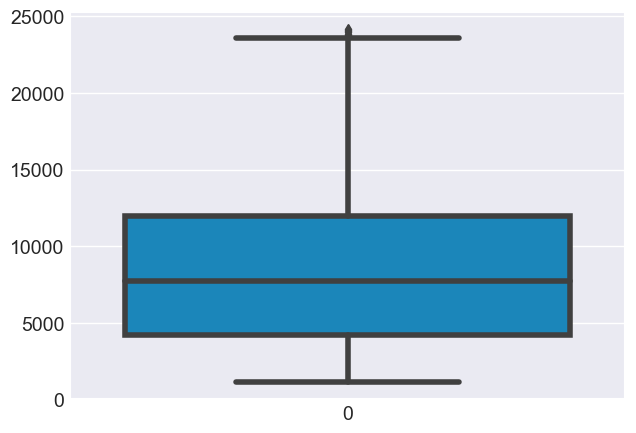

In [22]:
sns.boxplot(medical.charges);

## Analysis

In [23]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1331,52,female,44.700,3,no,southwest,11411.68500
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350


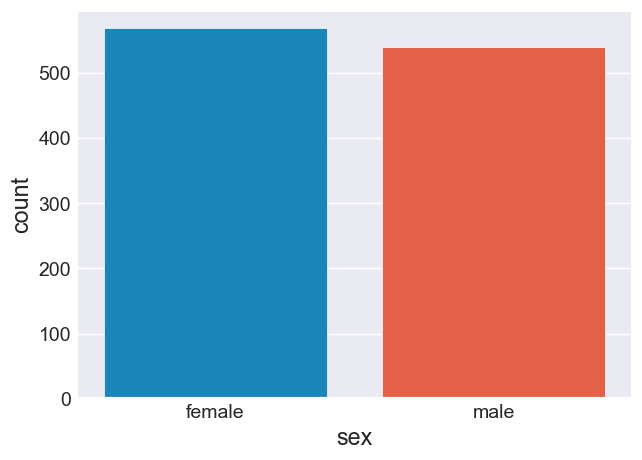

In [24]:
sns.countplot(x = medical.sex);

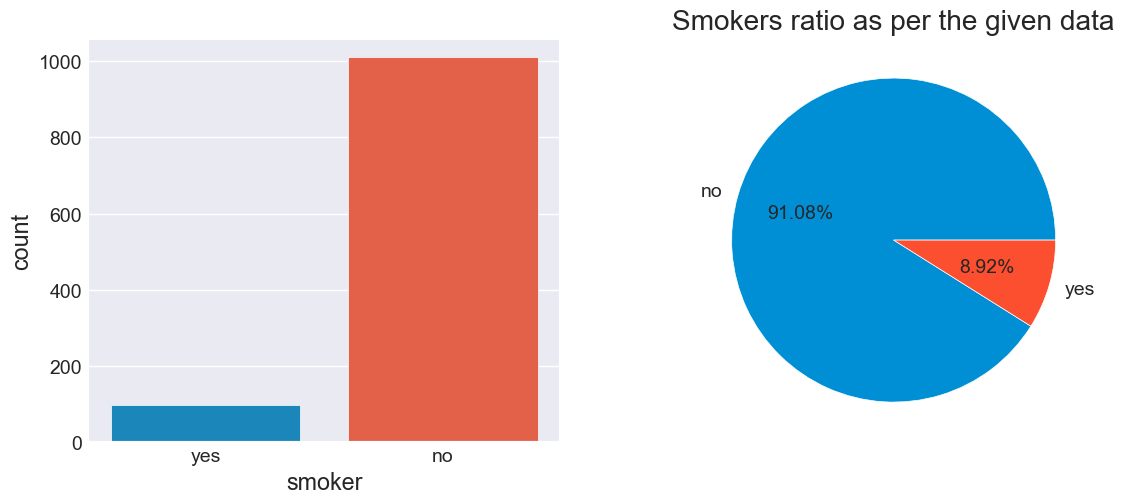

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x=medical.smoker)
plt.subplot(122)
plt.title('Smokers ratio as per the given data')
plt.pie(medical.smoker.value_counts().values,labels=medical.smoker.value_counts().index, autopct='%.2f%%');


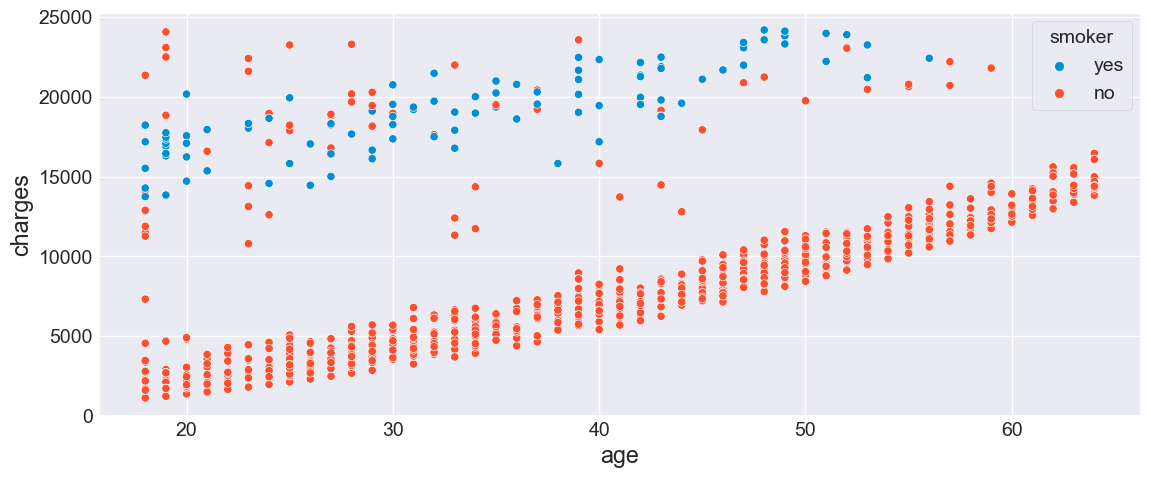

In [26]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=medical.age, y=medical.charges, hue=medical.smoker);

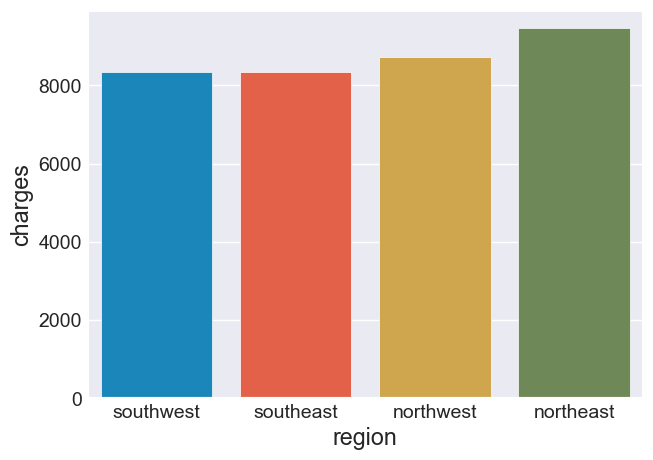

In [27]:
sns.barplot(x=medical.region, y=medical.charges, ci= False);

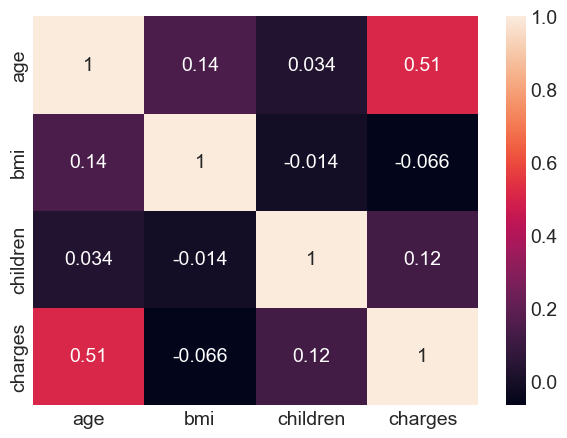

In [28]:
sns.heatmap(medical.corr(), annot=True);

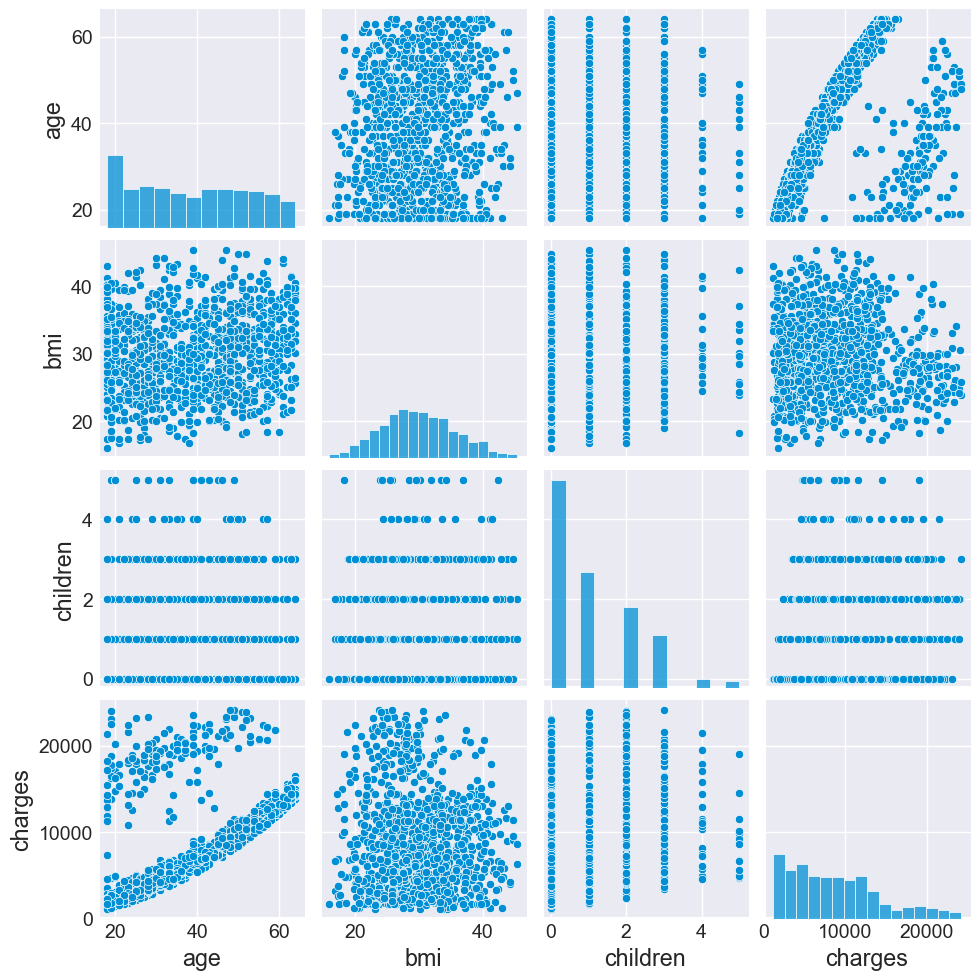

In [29]:
sns.pairplot(medical);

## Machine Learning Problem
#### Build a system which can take features of medical Insurance like age, sex, bmi, children, smoker, region etc.. and predict the medical costs billed by health insurance.

Target Variable: Charges

## Identifying the Input and Output Variables

In [30]:
y = medical['charges']
X = medical.drop(['charges'], axis=1)

In [31]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(832, 6) (832,)
(278, 6) (278,)


In [32]:
X_train

,age,sex,bmi,children,smoker,region
923,43,male,23.200,0,no,southwest
392,48,male,31.445,1,no,northeast
1219,30,female,21.945,1,no,northeast
748,28,male,30.875,0,no,northwest
755,39,female,22.800,3,no,northeast
...,...,...,...,...,...,...
969,50,female,28.160,3,no,southeast
68,40,female,36.190,0,no,southeast
427,18,female,29.165,0,no,northeast
99,38,male,19.300,0,yes,southwest


## Separating Categorical and Numerical Columns:

In [33]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [34]:
X_train_num.head()

,age,bmi,children
923,43,23.200,0
392,48,31.445,1
1219,30,21.945,1
748,28,30.875,0
755,39,22.800,3


In [35]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [36]:
X_train_cat

,sex,smoker,region
923,male,no,southwest
392,male,no,northeast
1219,female,no,northeast
748,male,no,northwest
755,female,no,northeast
...,...,...,...
969,female,no,southeast
68,female,no,southeast
427,female,no,northeast
99,male,yes,southwest


## Scaling the Numerical Features

In [37]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
923,0.313045,-1.127407,-0.901064
392,0.674685,0.256018,-0.071766
1219,-0.627219,-1.337983,-0.071766
748,-0.771876,0.160378,-0.901064
755,0.023733,-1.194523,1.586829


## Scaling the Categorical Features

## Applying OneHotEncoding on Categorical Columns

In [38]:
X_train_cat['sex'].value_counts(normalize=True)
print('-'*30)
X_train_cat['smoker'].value_counts(normalize=True)
print('-'*30)
X_train_cat['region'].value_counts(normalize=True)

female    0.527644
male      0.472356
Name: sex, dtype: float64

------------------------------


no     0.909856
yes    0.090144
Name: smoker, dtype: float64

------------------------------


northeast    0.257212
southeast    0.253606
southwest    0.245192
northwest    0.243990
Name: region, dtype: float64

In [39]:
# scaling the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
923,1.0,0.0,0.0,0.0,1.0
392,1.0,0.0,0.0,0.0,0.0
1219,0.0,0.0,0.0,0.0,0.0
748,1.0,0.0,1.0,0.0,0.0
755,0.0,0.0,0.0,0.0,0.0


## Concatenating the Encoded Categorical Features and Transformed Numerical Features

In [40]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
923,0.313045,-1.127407,-0.901064,1.0,0.0,0.0,0.0,1.0
392,0.674685,0.256018,-0.071766,1.0,0.0,0.0,0.0,0.0
1219,-0.627219,-1.337983,-0.071766,0.0,0.0,0.0,0.0,0.0
748,-0.771876,0.160378,-0.901064,1.0,0.0,1.0,0.0,0.0
755,0.023733,-1.194523,1.586829,0.0,0.0,0.0,0.0,0.0


### Preparing Test Data

In [41]:
X_test.head()
print('='*45)
X_test.info()

,age,sex,bmi,children,smoker,region
512,51,male,22.42,0,no,northeast
1037,22,male,28.88,0,no,northeast
869,50,male,36.20,0,no,southwest
800,64,female,35.97,0,no,southeast
603,19,female,28.31,0,yes,northwest


<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 512 to 690
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       278 non-null    int64  
 1   sex       278 non-null    object 
 2   bmi       278 non-null    float64
 3   children  278 non-null    int64  
 4   smoker    278 non-null    object 
 5   region    278 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 15.2+ KB


In [42]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,sex,smoker,region
512,male,no,northeast
1037,male,no,northeast
869,male,no,southwest
800,female,no,southeast
603,female,yes,northwest


In [43]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,age,bmi,children
512,51,22.42,0
1037,22,28.88,0
869,50,36.20,0
800,64,35.97,0
603,19,28.31,0


In [44]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
512,0.891669,-1.258283,-0.901064
1037,-1.205844,-0.174362,-0.901064
869,0.819341,1.053858,-0.901064
800,1.831933,1.015267,-0.901064
603,-1.422828,-0.270002,-0.901064


In [45]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
512,1.0,0.0,0.0,0.0,0.0
1037,1.0,0.0,0.0,0.0,0.0
869,1.0,0.0,0.0,0.0,1.0
800,0.0,0.0,0.0,1.0,0.0
603,0.0,1.0,1.0,0.0,0.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [46]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
512,0.891669,-1.258283,-0.901064,1.0,0.0,0.0,0.0,0.0
1037,-1.205844,-0.174362,-0.901064,1.0,0.0,0.0,0.0,0.0
869,0.819341,1.053858,-0.901064,1.0,0.0,0.0,0.0,1.0
800,1.831933,1.015267,-0.901064,0.0,0.0,0.0,1.0,0.0
603,-1.422828,-0.270002,-0.901064,0.0,1.0,1.0,0.0,0.0


## Feature Engineering

In [47]:
from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()

In [48]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_linear, n_features_to_select=4)

rfe = rfe.fit(X_train_transformed, y_train)

In [49]:
temp_df = pd.DataFrame({'Columns' : X_train_transformed.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,age,True,1
1,bmi,False,5
2,children,False,2
3,sex_male,False,4
4,smoker_yes,True,1
5,region_northwest,False,3
6,region_southeast,True,1
7,region_southwest,True,1


In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [51]:
regressor.feature_importances_

array([0.40715748, 0.15344245, 0.03990456, 0.01876749, 0.34069135,
       0.01434269, 0.0183872 , 0.00730679])

<Figure size 1500x700 with 0 Axes>

<AxesSubplot: >

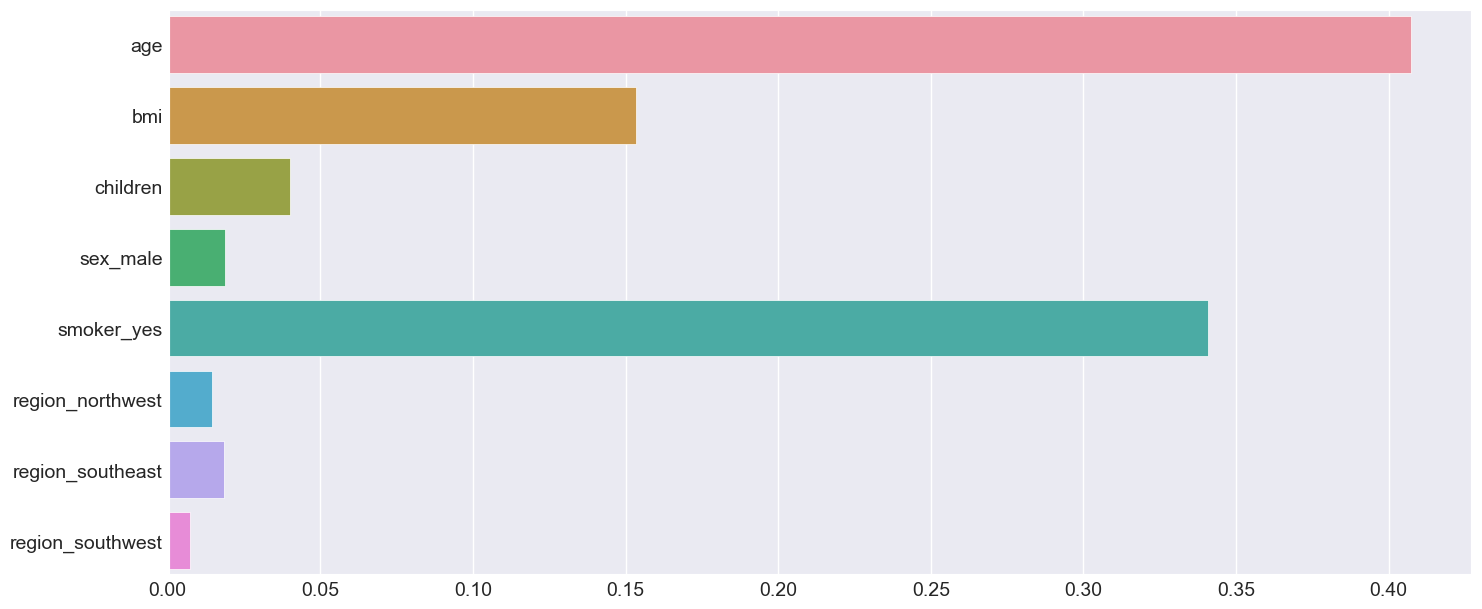

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x = regressor.feature_importances_, y = X_train_transformed.columns)

In [54]:
X_train_transformed.head()
X_train_transformed.columns

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
923,0.313045,-1.127407,-0.901064,1.0,0.0,0.0,0.0,1.0
392,0.674685,0.256018,-0.071766,1.0,0.0,0.0,0.0,0.0
1219,-0.627219,-1.337983,-0.071766,0.0,0.0,0.0,0.0,0.0
748,-0.771876,0.160378,-0.901064,1.0,0.0,1.0,0.0,0.0
755,0.023733,-1.194523,1.586829,0.0,0.0,0.0,0.0,0.0


Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [57]:
X_train_transformed.drop(['region_northwest', 'region_southeast', 'region_southwest'],axis=1,inplace=True)

In [59]:
X_test_transformed.drop(['region_northwest', 'region_southeast', 'region_southwest'],axis=1,inplace=True)

In [60]:
X_train_transformed.head()
X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes
923,0.313045,-1.127407,-0.901064,1.0,0.0
392,0.674685,0.256018,-0.071766,1.0,0.0
1219,-0.627219,-1.337983,-0.071766,0.0,0.0
748,-0.771876,0.160378,-0.901064,1.0,0.0
755,0.023733,-1.194523,1.586829,0.0,0.0


,age,bmi,children,sex_male,smoker_yes
512,0.891669,-1.258283,-0.901064,1.0,0.0
1037,-1.205844,-0.174362,-0.901064,1.0,0.0
869,0.819341,1.053858,-0.901064,1.0,0.0
800,1.831933,1.015267,-0.901064,0.0,0.0
603,-1.422828,-0.270002,-0.901064,0.0,1.0


In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [91]:
from sklearn.linear_model import Lasso
tuned_parameters = [{'alpha':[i for i in range(1, 20)]}]

clf = GridSearchCV(
    estimator=Lasso(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('R2 Score: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'alpha': 1}
Lasso(alpha=1)
R2 Score:  0.722547824690464


In [96]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003568,0.003863,0.001400,4.867458e-04,1,{'alpha': 1},0.786213,0.633333,0.593559,0.748036,...,0.679736,0.073977,1,0.656978,0.691425,0.702669,0.660687,0.689410,0.680234,0.018087
1,0.002195,0.000389,0.001007,1.549288e-05,2,{'alpha': 2},0.786077,0.633385,0.593540,0.748028,...,0.679731,0.073924,2,0.656976,0.691423,0.702666,0.660684,0.689408,0.680231,0.018087
2,0.002450,0.000571,0.001413,4.907561e-04,3,{'alpha': 3},0.785940,0.633435,0.593521,0.748019,...,0.679725,0.073872,3,0.656972,0.691419,0.702663,0.660681,0.689404,0.680228,0.018087
3,0.001404,0.000492,0.000995,2.438564e-05,4,{'alpha': 4},0.785800,0.633484,0.593500,0.748008,...,0.679717,0.073819,4,0.656967,0.691414,0.702658,0.660675,0.689399,0.680223,0.018087
4,0.001635,0.000469,0.000809,4.048601e-04,5,{'alpha': 5},0.785660,0.633531,0.593478,0.747995,...,0.679707,0.073766,5,0.656961,0.691407,0.702651,0.660668,0.689392,0.680216,0.018087
5,0.001973,0.000475,0.000988,4.338574e-05,6,{'alpha': 6},0.785517,0.633577,0.593455,0.747981,...,0.679697,0.073713,6,0.656953,0.691399,0.702643,0.660659,0.689384,0.680208,0.018087
6,0.001605,0.000490,0.001011,5.032397e-05,7,{'alpha': 7},0.785373,0.633622,0.593431,0.747964,...,0.679684,0.073659,7,0.656944,0.691389,0.702633,0.660649,0.689375,0.680198,0.018087
7,0.001430,0.000475,0.001041,4.960010e-05,8,{'alpha': 8},0.785245,0.633665,0.593405,0.747945,...,0.679674,0.073611,8,0.656934,0.691378,0.702622,0.660637,0.689364,0.680187,0.018087
8,0.001450,0.000506,0.000814,4.078771e-04,9,{'alpha': 9},0.785156,0.633707,0.593379,0.747924,...,0.679670,0.073574,9,0.656924,0.691366,0.702610,0.660624,0.689351,0.680175,0.018086
9,0.001618,0.000460,0.001022,5.570034e-05,10,{'alpha': 10},0.785065,0.633747,0.593351,0.747902,...,0.679665,0.073537,10,0.656913,0.691351,0.702596,0.660609,0.689337,0.680161,0.018086


In [97]:
from sklearn.linear_model import Ridge
tuned_parameters = [{'alpha':[i for i in range(1, 20)]}]

clf = GridSearchCV(
    estimator=Ridge(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [98]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('R2 Score: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'alpha': 1}
Ridge(alpha=1)
R2 Score:  0.7219230228194247


### Training the data
### Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [100]:
y_test_pred = regressor.predict(X_test_transformed)

In [101]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('=='*30)
print('R2 Score: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  1505.2330333862408
Mean Squared Error:  8472646.052705327
Root Mean Squared Error:  2910.7810039069113
R2 Score:  0.7225771042786564


In [102]:
linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
linear_df.head()

,Actual,Predicted
512,9361.3268,9698.304116
1037,2250.8352,3100.107534
869,8457.8180,9677.184365
800,14313.8463,13353.086351
603,17468.9839,15554.926769


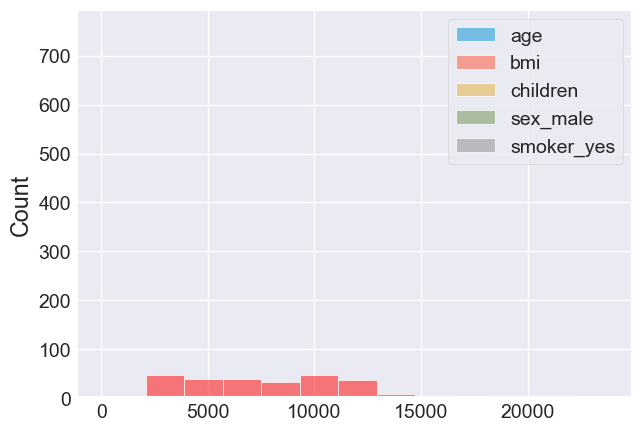

In [103]:
sns.histplot(X_train_transformed, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### KNN Regression

In [67]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [68]:
y_test_pred = regressor.predict(X_test_transformed)

In [69]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
knn_df.head()

,Actual,Predicted
512,9361.3268,8928.140110
1037,2250.8352,1708.674910
869,8457.8180,10964.004082
800,14313.8463,13456.849270
603,17468.9839,17266.089040


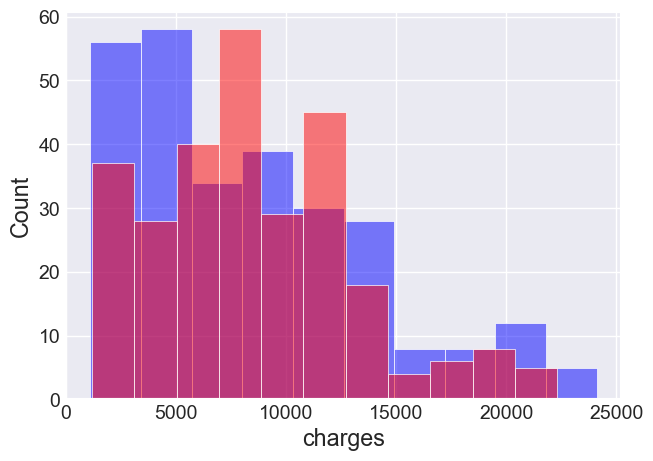

In [70]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [71]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  1796.6643549625899


### Decision Tree Regression

In [104]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[i for i in range(1, 20)]}]

dt = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
dt.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [106]:
print("Best parameters set found on train set")
print(dt.best_params_)
print(dt.best_estimator_)
print('R2 Score: ', dt.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 4}
DecisionTreeRegressor(max_depth=4)
R2 Score:  0.6944457521231044


In [108]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [109]:
y_test_pred = regressor.predict(X_test_transformed)
dtr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dtr_df.head()

,Actual,Predicted
512,9361.3268,8442.66700
1037,2250.8352,1906.35825
869,8457.8180,8798.59300
800,14313.8463,14692.66935
603,17468.9839,17748.50620


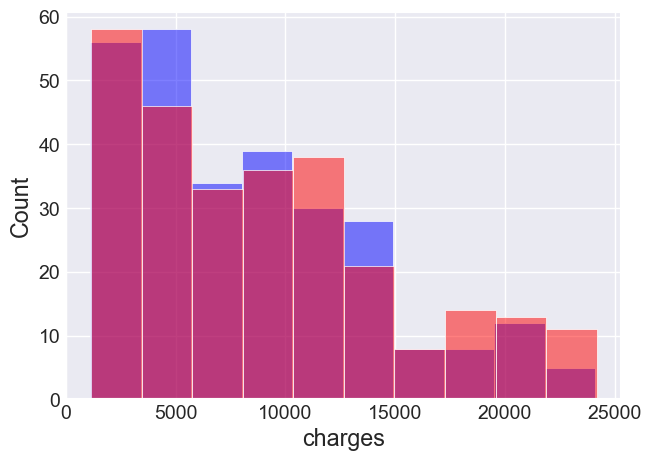

In [110]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [111]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('=='*30)
print('R2 Score: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  2013.5828737230215
Mean Squared Error:  22127382.88950918
Root Mean Squared Error:  4703.9752220339315
R2 Score:  0.27547514698994524


### Random Forest Regression

In [112]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [113]:
y_test_pred = regressor.predict(X_test_transformed)
rfr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

rfr_df.head()

,Actual,Predicted
512,9361.3268,8922.478669
1037,2250.8352,1883.592544
869,8457.8180,8724.166921
800,14313.8463,14459.090375
603,17468.9839,17699.438855


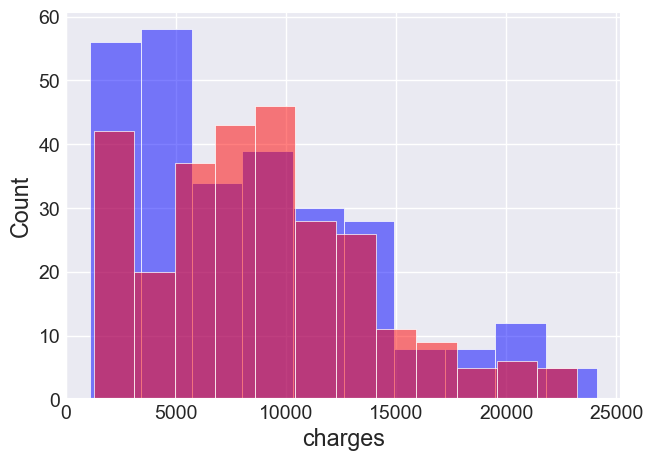

In [114]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [115]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  1684.1922501208517


### Support Vector Regression

In [116]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [117]:
y_test_pred = regressor.predict(X_test_transformed)
svc_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

svc_df.head()

,Actual,Predicted
512,9361.3268,8047.294223
1037,2250.8352,7897.375875
869,8457.8180,8054.804359
800,14313.8463,8093.246578
603,17468.9839,7939.235173


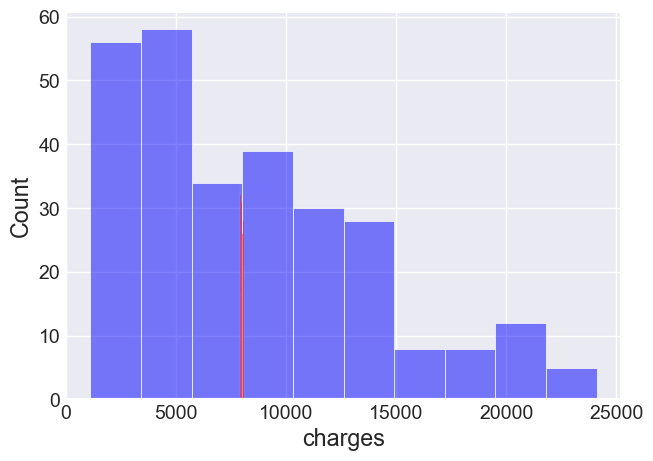

In [118]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [119]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  4474.259889963606


In [120]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

GradientBoostingRegressor()

Mean Absolute Error:  1425.1850735744965


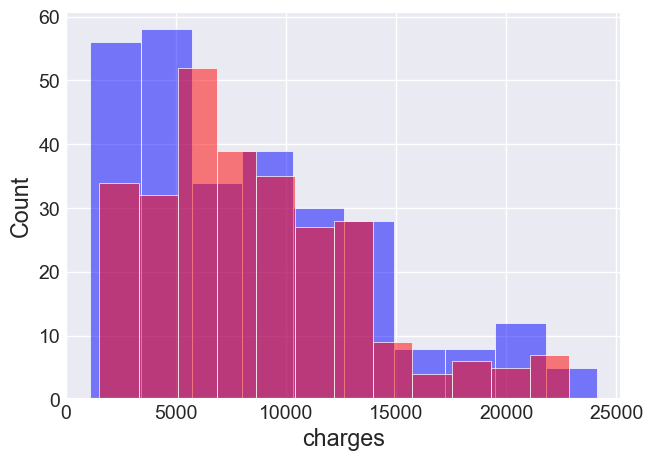

In [121]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Conclusion:
- Byseening all the Algorithms `GBDT(GradientBoostingRegressor)` is performing better compared to the other algorthims for the medical cost prediction.
- `GBDT(GradientBoostingRegressor)` is the less Error of `1425.3389773340036`.